# OpenCL兼容GPU上的Richardson-Lucy反卷积
[Richardson-Lucy反卷积](https://en.wikipedia.org/wiki/Richardson%E2%80%93Lucy_deconvolution)是显微镜图像反卷积中常见且基本的算法。在本notebook中，我们将使用napari插件[RedLionFish](https://github.com/rosalindfranklininstitute/RedLionfish)中实现的GPU加速版本。因此，您可以在napari的图形用户界面中使用相同的算法。

In [1]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
import RedLionfishDeconv as rl
import matplotlib.pyplot as plt

我们将加载一张显示沿线荧光强度的图像。这个3D图像是用共焦显微镜拍摄的。

In [2]:
image = imread('../../data/DeconvolutionSampleVerticalGrid1AU-crop.tif')
image.shape

(21, 150, 150)

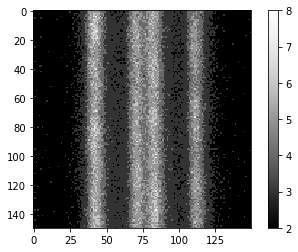

In [3]:
imshow(image, colorbar=True)

以下PSF图像是使用[之前解释的程序](deconvolution:extract_psf)从同一显微镜拍摄的图像中提取的。

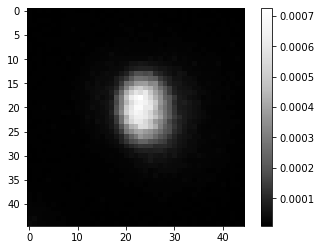

In [4]:
psf = imread('../../data/psf.tif')

imshow(psf, colorbar=True)

现在我们可以使用RedLionFish的Richardson-Lucy反卷积算法对图像进行反卷积。我们应该指定算法在`gpu`上执行。

ERROR:root:Failed to setup Reikna with OpenCL.
ERROR:root:No module named 'reikna'


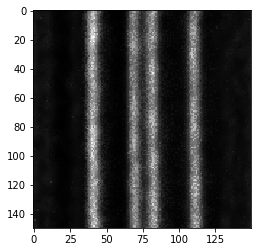

In [5]:
iterations = 50

deconvolved = rl.doRLDeconvolutionFromNpArrays(image, 
                                               psf, 
                                               niter=iterations, 
                                               method='gpu', 
                                               resAsUint8=False )
imshow(deconvolved)

为了更精确地可视化原始图像和反卷积版本之间的差异，我们可以绘制从左到右的线上的强度。我们从Z轴上的最大强度投影中获取这些数字。

In [6]:
max_intensity_image = image.max(axis=0)
max_intensity_image.shape

(150, 150)

In [7]:
max_intensity_deconvolved = deconvolved.max(axis=0)
max_intensity_deconvolved.shape

(150, 150)

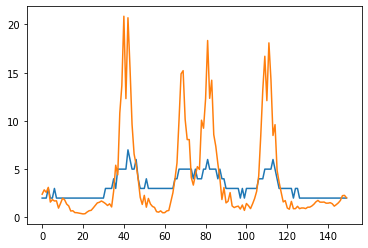

In [8]:
plt.plot(max_intensity_image[80])
plt.plot(max_intensity_deconvolved[80])
plt.show()

如您所见，通过反卷积，强度范围发生了变化。这取决于算法和实现。在应用反卷积时，考虑检查原始图像和反卷积图像中的总强度是否在相同范围内：

In [9]:
image.min(), image.max()

(1, 8)

In [10]:
deconvolved.min(), deconvolved.max()

(0.0, 28.122286)